In [1]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
import zipfile

with zipfile.ZipFile("fruit_subset_100.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/fruit_subset_100")

In [11]:
# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/fruit_subset_100",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

class_names = train_ds.class_names

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/fruit_subset_100",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [12]:


# Prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [14]:
# EfficientNetB0 Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.8224 - loss: 0.6288 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 9.7823e-04
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 4.5155e-04
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 1.0000 - loss: 5.4647e-04 - val_accuracy: 1.0000 - val_loss: 3.2148e-04
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 1.0000 - loss: 5.0054e-04 - val_accuracy: 1.0000 - val_loss: 2.5186e-04
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 1.0000 - loss: 4.1118e-04 - val_accuracy: 1.0000 - val_loss: 2.1114e-04
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 1.0000 - loss: 2.4516e-04 - val_accuracy: 1.0000 - val_loss: 1.8630e-04
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 1.0000 - loss: 2

In [17]:
model.save("/content/efficientnet_model.keras")

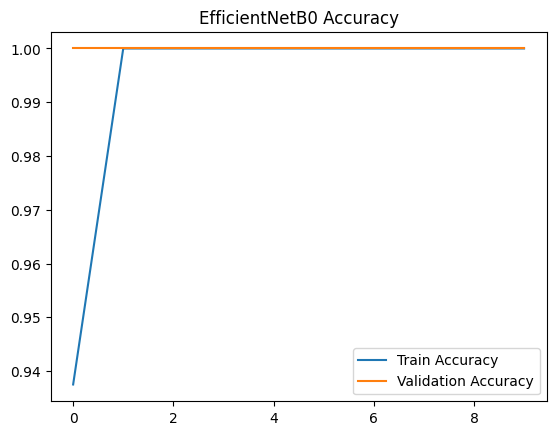

In [19]:
# Plot learning curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("EfficientNetB0 Accuracy")
plt.show()

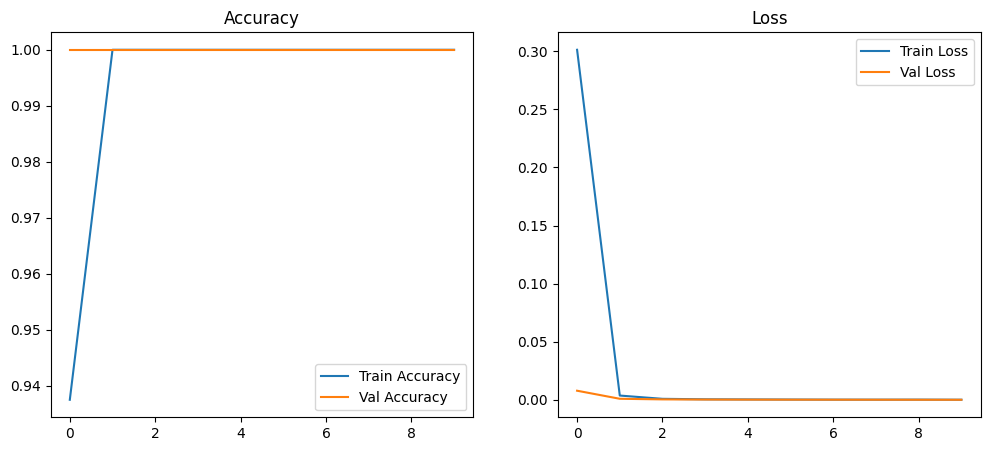

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()
